# Project Part 2: Amazon Beauty Products

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
path=''#'/content/drive/Shareddrives/Introduction to Data Science/data/'

## 1. Introduction

Importing some libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import datetime
import json
from scipy.stats import gaussian_kde
from scipy.stats import zscore
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 2. Loading Datasets 

Getting familiar with the data we have

### 2.1 meta_All_Beauty.json

This dataset contains all the product details

In [3]:
import json
import numpy as np
import pandas as pd

product = []
with open(path + 'meta_All_Beauty.json') as f:
    for line in f:
        product.append(json.loads(line))

In [4]:
raw_product_table = pd.DataFrame(product)
raw_product_table.head(10)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",[],,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],[https://images-na.ssl-images-amazon.com/image...,,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],[https://images-na.ssl-images-amazon.com/image...,,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790
5,[],,[Mary Kay Satin Hands Peach Hand Cream Travel ...,,Mary Kay Satin Hands Hand Cream Travel MINI Si...,[],[],,Mary Kay,[],"699,317 in Beauty & Personal Care (",[],"{'Shipping Weight:': '2.4 ounces', 'ASIN: ': '...",All Beauty,,,,7535842801
6,[],,[],,Unique Custom Cast Iron Liner Shader Tattoo Ma...,[],[],,,[],"3,206,658 in Beauty & Personal Care (",[],{'ASIN: ': '7538626107'},All Beauty,,,,7538626107
7,[],,"[According to the legend, in 1613, two brother...",,Imagen Bendita Por Su Santidad Our Lady of Cha...,[],[],,Chango,[],"1,741,858 in Beauty & Personal Care (",[],"{' Item Weight: ': '8 ounces', 'Shipp...",All Beauty,,,,8279996397
8,[],,[Novi prevod proslavljene knjige Zadruga objav...,,Mali princ,[],[https://images-na.ssl-images-amazon.com/image...,,Srpska knjizevna zadruga,[],"2,136,432 in Beauty &amp; Personal Care (",[],"{'Shipping Weight:': '7.7 ounces', 'ASIN: ': '...",All Beauty,,,,8637910351
9,[],,[Moleskine's Card Wallet in Payne's Grey is th...,,Moleskine Payne's Grey Card Wallet (Moleskine ...,[],[https://images-na.ssl-images-amazon.com/image...,,Sunatoria,[],"1,260,339 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '2.8 x 4.3 ...,All Beauty,,,,8867326759


In [5]:
brand = raw_product_table['brand'].value_counts()
brand = pd.DataFrame(brand)
brand_10 = brand[brand['brand']>100]
brand_10

,brand
,15673
VAGA,252
L'Oreal Paris,113


In [6]:
vaga = raw_product_table[raw_product_table['brand'] == 'VAGA']
vaga.head(20)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
6130,[],,[<b>Best Value High Quality Make Up Set With E...,,Great Value Premium Quality Professional Make ...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,789,945 in Beauty & Personal Care (",[],"{'Shipping Weight:': '14.9 ounces', 'ASIN: ': ...",All Beauty,,,,B0062HWVO8
13400,[],,[<b>Vintage Owl Earrings</b><br><br>This VAGA ...,,Pair of Fun Vintage Retro Black Gold Cute Owl ...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,435,220 in Beauty & Personal Care (",[],"{'ASIN: ': 'B00JRECQ8E', 'UPC:': '784672186735'}",All Beauty,,,$3.49,B00JRECQ8E
13401,[],,[<b>Vintage Globe and Binoculars Pendant Neckl...,,Vintage Antique Bronze Globe Tellurian Binocul...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,596,404 in Beauty & Personal Care (",[],"{'ASIN: ': 'B00JRECNSM', 'UPC:': '784672186759'}",All Beauty,,,$4.49,B00JRECNSM
13402,[],,[<b>Vintage Red Jewel Heart Pendant Necklace</...,,Vintage Style Angel Wings Wrapped Around a Red...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"963,977 in Beauty & Personal Care (",[],"{'ASIN: ': 'B00JRECNN2', 'UPC:': '784672186711'}",All Beauty,,,$3.99,B00JRECNN2
13403,[],,[<b>Vintage Victorian Curled Moustache Earring...,,Vintage Victoriana Retro Style Black Enamel Cu...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,055,650 in Beauty & Personal Care (",[],"{'ASIN: ': 'B00JRECQGQ', 'UPC:': '784672186780'}",All Beauty,,,$2.99,B00JRECQGQ
14040,[],,[<b>Leather Strappy Bracelet with Angels Wing ...,,Black Leather Fashion Angels Wings Strappy Wri...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,274,779 in Beauty & Personal Care (",[],{' Product Dimensions: ': '0.3 x 1.2 ...,All Beauty,,,$3.99,B00KHYGIKK
14041,[],,[<b>Shamballa Friendship Bracelet with Crystal...,,Black Silver Owl Shamballa Crystal Beads Fashi...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,178,310 in Beauty & Personal Care (",[],{' Product Dimensions: ': '0.4 x 0.7 ...,All Beauty,,,$4.49,B00KHYGMFQ
14042,[],,[<b>Stunning Geometric Retro Shape Choker Neck...,,Black &amp; Gold Boho Triangle Geometric Shape...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,845,459 in Beauty & Personal Care (",[],{' Product Dimensions: ': '0.2 x 0.4 ...,All Beauty,,,$4.49,B00KHYGKNA
14043,[],,[<b>Vintage Style Necklace with Stunning Fairy...,,Vintage Classic Style Bronze Chain Fashion Nec...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,505,466 in Beauty & Personal Care (",[],{' Product Dimensions: ': '0.2 x 15.8...,All Beauty,,,$3.99,B00KHYGN6O
14044,[],,[<b>Purple Heart Crystal Pendant - Silver Colo...,,Silver Purple Swarovski Crystal Diamante Heart...,[],[https://images-na.ssl-images-amazon.com/image...,,VAGA,[],"1,042,277 in Beauty & Personal Care (",[],{' Product Dimensions: ': '0.2 x 0.6 ...,All Beauty,,,$3.99,B00KHYGSWI


### 2.2 Review_Beauty.json

This file contains all the review given by customers.

In [7]:
import json
import numpy as np
import pandas as pd

review = []
with open(path + 'Review_Beauty.json') as f:
    for line in f:
        review.append(json.loads(line))

In [8]:
raw_review_table = pd.DataFrame(review)
raw_review_table.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN
5,5.0,False,"02 26, 2010",A36NF437WZLQ9E,0143026860,W. Powell,Today I gave a book about the Negro Leagues of...,The Gift of Black Baseball,1267142400,4,NaN,NaN
6,4.0,False,"03 7, 2001",A10Q8NIFOVOHFV,0143026860,Robert S. Clay Jr.,The story of race relations in American histor...,"Baseball, America, and racism.",983923200,14,NaN,NaN
7,1.0,True,"04 10, 2017",A26PO1B2Q2G1CS,014789302X,Jacqueline Diaz,I didn't like this product it smudged all unde...,One Star,1491782400,NaN,NaN,NaN
8,5.0,True,"01 3, 2017",AQ812VYVTC2RJ,014789302X,Khadijah Ali-Evans,I simply love the product. I appreciate print ...,Five Stars,1483401600,NaN,NaN,NaN
9,1.0,True,"11 19, 2016",AMACNEW14ADMX,014789302X,rabiyaa123,it burns your eyes when u put it on and very ...,i do not recommend.,1479513600,3,NaN,NaN


### 2.3 All_Beauty.csv

csv file provide by lecturer.

In [9]:
header_names = ['ProductID', 'UserID', 'Review', 'Date']
review_simplified = pd.read_csv(path + 'All_Beauty.csv', header=None, names=header_names)
review_simplified.head()

,ProductID,UserID,Review,Date
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800
2,0143026860,A1572GUYS7DGSR,4.0,1407628800
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200


In [10]:
review_simplified.shape

(371345, 4)

## 3. Data Cleaning

Cleaning our data, which includes the steps below:

Step 1 : Remove duplicates or irrelevant observations

Step 2 : Fix structural errors

Step 3 : Identify and handle outliers

Step 4 : Handle missing data


### 3.1 Cleaning meta_All_Beauty.json

Which is now loaded into Product (a DataFrame)

In [11]:
#drop irrelevant observations
product_table = raw_product_table.drop(['category','tech1','description', 'fit','image','tech2','feature','main_cat','similar_item','date'], axis=1)


In [12]:
# some ASIN inside details has space after 
# example  'ASIN: ' vs 'ASIN:'
# but going to drop 'details' because didn't use it
# this is to check whether the asin and the ASIN inside details is correct

count = 0
index_to_drop = [] 

for i in range(len(product_table.index)):
    dct = product_table['details'].iloc[i]
    if 'ASIN: ' in dct: 
        asin = dct['ASIN: ']
    elif 'ASIN:' in dct:
        asin = dct['ASIN:']
    if asin != product_table['asin'].iloc[i]:
        index_to_drop.append(i)
        count += 1
        
print(count)

437


In [13]:
##drop irrelevant observations
product_table = raw_product_table.drop(['category','tech1','description','fit','image','tech2','brand','feature','main_cat','similar_item','date','details'],axis = 1)

##drop duplicates
#no duplicate asins and row
product_table.drop_duplicates(['asin'],inplace = True)
product_table.reset_index(drop=True, inplace=True)

##fix structural errors

#for column 'rank' 
#remove uneccessary symbol like comma ',' and words
#convert the string into integer 
product_table['rank'].replace(',','', regex=True, inplace=True)
product_table['rank'] = product_table['rank'].str.extract('(\d+)')

#for column 'price'
#if 'price' don't start with $ or has '-' means null value, fillna with 'unknown'
#remove uneccessary symbol like comma ',' and '$'
product_table.loc[product_table["price"].str[0] != "$", "price"] = "unknown"
product_table.loc[product_table["price"].str.contains('-'), "price"] = "unknown"
product_table['price'].replace("\$","", regex=True, inplace=True)
product_table['price'].replace(',','', regex=True, inplace=True)

##deal with missing data
#missing data in 'rank' and 'price'
#product_table.replace('\[]','', regex=True, inplace=True)
product_table['rank'].fillna(0,inplace = True)
product_table['price'].replace("unknown",0, regex=True, inplace=True)
product_table.fillna("unknown",inplace = True)

##changing data type
product_table['rank']= product_table['rank'].astype(int)
product_table['price'] = product_table['price'].apply(pd.to_numeric)

##Identify and handle outliers
z_scores = stats.zscore(pd.DataFrame(product_table['rank']))
abs_z_scores = np.abs(z_scores)
outlier = (abs_z_scores > 3).all(axis=1)
product_table.drop(product_table[outlier].index, inplace = True)

product_table.shape

(32487, 6)

In [14]:
unique = product_table["asin"].value_counts()
unique

B004VD0EUI    1
B017ADRVG0    1
B00DC6MICM    1
B00P8SWA1Q    1
B00RH3PYIG    1
             ..
B004Y0GWEK    1
B01F3ZBTM4    1
B00HIZ6QN0    1
B01E9I829Y    1
B004HL8KAU    1
Name: asin, Length: 32487, dtype: int64

### 3.2 Cleaning Review_Beauty.json
Which is now loaded into review (a DataFrame)

In [15]:
##drop irrelevant observations
review_table = raw_review_table.drop(['reviewerName','reviewText','summary','unixReviewTime','style','image'],axis = 1)

##drop duplicates
review_table.drop_duplicates(inplace = True)
review_table.reset_index(drop=True, inplace=True)

##fix structural errors
#for column 'vote'
#remove uneccessary symbol ','
review_table['vote'].replace(',','', regex=True, inplace=True)
test_review_table = review_table.copy(deep=True)

##deal with missing data
review_table['vote'].fillna(0,inplace = True)
review_table.fillna('unknown',inplace = True)

##changing data type
review_table['vote'] = review_table['vote'].astype(int)

#separate reviewTime into three different columns
review_table['reviewTime'].replace(',','', regex=True, inplace=True)
date = review_table['reviewTime'].str.split(' ', n=2,expand = True)
date.columns =['month','day','year']

#drop reviewTime column
review_table.drop(['reviewTime'],axis = 1,inplace = True)

#concat both of the tables
review_table = pd.concat([review_table,date], axis=1)

#rearrange sequence of the columns
cols = review_table.columns.tolist()
cols = cols[-1:] + cols[-3:-1] + cols[:-3]
review_table = review_table[cols]

review_table

,year,month,day,overall,verified,reviewerID,asin,vote
0,2015,02,19,1.0,True,A1V6B6TNIC10QE,0143026860,0
1,2014,12,18,4.0,True,A2F5GHSXFQ0W6J,0143026860,0
2,2014,08,10,4.0,True,A1572GUYS7DGSR,0143026860,0
3,2013,03,11,5.0,True,A1PSGLFK1NSVO,0143026860,0
4,2011,12,25,5.0,True,A6IKXKZMTKGSC,0143026860,5
...,...,...,...,...,...,...,...,...
362398,2017,07,20,1.0,True,A202DCI7TV1022,B01HJEGTYK,0
362399,2017,03,16,5.0,True,A3FSOR5IJOFIBE,B01HJEGTYK,34
362400,2017,03,1,5.0,True,A1B5DK6CTP2P24,B01HJEGTYK,46
362401,2017,02,21,2.0,True,A23OUYS5IRMJS9,B01HJEGTYK,0


## 4. Merging
Merge review_table with product_table

### 4.1 Merging review_table and product_table
Merging the two tables.

In [16]:
# Outer merge of review_table & product_table
dfMergedOuter = (pd.merge(product_table,review_table, on='asin', how='outer', indicator=True)).set_index('asin')

# Outer left (product_table), to find out the product that doesn't have any review
dfMergedOuterProduct=dfMergedOuter[dfMergedOuter['_merge']=='left_only']
dfMergedOuterProduct

,title,also_buy,rank,also_view,price,year,month,day,overall,verified,reviewerID,vote,_merge
asin,,,,,,,,,,,,,
B000NICBSI,"Camille Beckman Glycerin Hand Therapy, English...",[],1568655.0,[],0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
B01HHYC4UA,BabyMax Professional Tourmaline Ceramic Automa...,[],1264645.0,[],0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [17]:
# Outer merge of review_table & product_table
dfMergedOuter2 = pd.merge(review_table, product_table, on='asin', how='outer', indicator=True)

# Outer left (review_table), to find out the product review that doesn't exist in product_table
dfMergedOuterReview=dfMergedOuter2[dfMergedOuter2['_merge']=='left_only']
dfMergedOuterReview

,year,month,day,overall,verified,reviewerID,asin,vote,title,also_buy,rank,also_view,price,_merge
0,2015,02,19,1.0,True,A1V6B6TNIC10QE,0143026860,0.0,NaN,NaN,NaN,NaN,NaN,left_only
1,2014,12,18,4.0,True,A2F5GHSXFQ0W6J,0143026860,0.0,NaN,NaN,NaN,NaN,NaN,left_only
2,2014,08,10,4.0,True,A1572GUYS7DGSR,0143026860,0.0,NaN,NaN,NaN,NaN,NaN,left_only
3,2013,03,11,5.0,True,A1PSGLFK1NSVO,0143026860,0.0,NaN,NaN,NaN,NaN,NaN,left_only
4,2011,12,25,5.0,True,A6IKXKZMTKGSC,0143026860,5.0,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340232,2017,08,13,5.0,True,AN3J2HI45DREW,B013NEZMZC,0.0,NaN,NaN,NaN,NaN,NaN,left_only
340233,2017,03,28,5.0,True,A24NA9JMU957GY,B013NEZMZC,0.0,NaN,NaN,NaN,NaN,NaN,left_only
340234,2017,03,15,5.0,True,A2B3AIG0UTSOJB,B013NEZMZC,0.0,NaN,NaN,NaN,NaN,NaN,left_only
340235,2016,10,1,5.0,True,A2TEBM1KX3OQHZ,B013NEZMZC,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [18]:
# to find the intersection betweeen both tables
dfMergedInner = (pd.merge(product_table,review_table, on='asin', how='inner', indicator=True)).set_index('asin')
dfMergedInner.reset_index(inplace = True)
dfMergedInner

,asin,title,also_buy,rank,also_view,price,year,month,day,overall,verified,reviewerID,vote,_merge
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,[],2938573,[],0.00,2013,08,13,4.0,True,A3349A7IGM954K,0,both
1,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,[],2938573,[],0.00,2009,01,29,1.0,False,A1OMHUU58XHQNG,7,both
2,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",872854,[],44.99,2017,10,6,3.0,True,A3Q0QXUKRGACMU,0,both
3,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,[],956696,"[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",28.76,2017,08,26,5.0,True,A3MQI5EJSEDO1K,0,both
4,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],1870258,[],0.00,2017,04,12,5.0,True,A29TKERPFM55B6,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357272,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,07,20,1.0,True,A202DCI7TV1022,0,both
357273,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,03,16,5.0,True,A3FSOR5IJOFIBE,34,both
357274,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,03,1,5.0,True,A1B5DK6CTP2P24,46,both
357275,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,02,21,2.0,True,A23OUYS5IRMJS9,0,both


After merging both tables, we found that there are 2 existing products without any reviews. Hence we drop them from product_table.

For review_table, there are 5120 reviews on products that were not in our dataset, we drop them too.

In [19]:
# Drop both products since they do not have any reviews
product_table.drop(product_table[product_table['asin']=='B000NICBSI'].index, inplace = True) 
product_table.drop(product_table[product_table['asin']=='B01HHYC4UA'].index, inplace = True) 

In [20]:
# Update our review table using the inner merge
final_review_table = dfMergedInner.drop(['title','also_buy','rank','also_view','price','reviewerID', '_merge'],axis = 1)
final_review_table

,asin,year,month,day,overall,verified,vote
0,6546546450,2013,08,13,4.0,True,0
1,6546546450,2009,01,29,1.0,False,7
2,7178680776,2017,10,6,3.0,True,0
3,7250468162,2017,08,26,5.0,True,0
4,7367905066,2017,04,12,5.0,True,0
...,...,...,...,...,...,...,...
357272,B01HJEGTYK,2017,07,20,1.0,True,0
357273,B01HJEGTYK,2017,03,16,5.0,True,34
357274,B01HJEGTYK,2017,03,1,5.0,True,46
357275,B01HJEGTYK,2017,02,21,2.0,True,0


After cleaning and merging the data, 32486 beauty products and 357283 reviews are remained in our dataset.


### 4.2 Final Merged Table
Final merged table has been prepared for future use in data processing

In [21]:
dfMergedInner

,asin,title,also_buy,rank,also_view,price,year,month,day,overall,verified,reviewerID,vote,_merge
0,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,[],2938573,[],0.00,2013,08,13,4.0,True,A3349A7IGM954K,0,both
1,6546546450,Loud 'N Clear&trade; Personal Sound Amplifier,[],2938573,[],0.00,2009,01,29,1.0,False,A1OMHUU58XHQNG,7,both
2,7178680776,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",872854,[],44.99,2017,10,6,3.0,True,A3Q0QXUKRGACMU,0,both
3,7250468162,No7 Stay Perfect Foundation Cool Vanilla by No7,[],956696,"[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",28.76,2017,08,26,5.0,True,A3MQI5EJSEDO1K,0,both
4,7367905066,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],1870258,[],0.00,2017,04,12,5.0,True,A29TKERPFM55B6,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357272,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,07,20,1.0,True,A202DCI7TV1022,0,both
357273,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,03,16,5.0,True,A3FSOR5IJOFIBE,34,both
357274,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,03,1,5.0,True,A1B5DK6CTP2P24,46,both
357275,B01HJEGTYK,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,"[B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...",478123,"[B06XNM7CGD, B071D7TMQS]",0.00,2017,02,21,2.0,True,A23OUYS5IRMJS9,0,both


## 5. Data Processing

We will be using `product_table` and `final_review_table` for our data analysis.

`product_table`: Contains 32486 unique beauty products selling on Amazon. All listed product have at least one review in our dataset. It contains sales rank and/or price that is 0.

`final_review_table`: Contains 357283 product reviews. All recorded reviews have a matching product in our dataset.

### Useful Functions

#### 5.0.1 process_merged_review

In [22]:
# calculates average rating of each product
# -----------------------------------------
# 1 parameter:
# review_arg['asin', 'overall']
# -----------------------------------------
# return:
# avg_review['asin', 'average-rating']
# -----------------------------------------

def avgReview(review_arg):
  avg_review = review_arg.groupby(['asin']).mean()
  avg_review.rename(columns={'overall':'average-rating'},inplace=True)
  avg_review.reset_index(inplace = True)
  return avg_review

In [23]:
# calculates number of reviews of each product
# --------------------------------------------
# 1 parameter:
# review['asin', 'overall']
# --------------------------------------------
# return:
# count_review ['asin', 'number-of-review']
# --------------------------------------------

def countReview(review_arg):
  count_review = review_arg.groupby(['asin']).count()
  count_review.rename(columns={'overall':'number-of-review'},inplace=True)
  count_review.reset_index(inplace = True)
  return count_review

In [24]:
# merge 3 dataframe together
# --------------------------------------------
# 3 paramters:
# avg_review_arg ['asin', 'average-rating']
# count_review_arg ['asin', 'number-of-review']
# product_rank_arg ['asin','rank']
# --------------------------------------------
# result:
# merged_review_table ['asin', 'average-rating', 'number-of-review', 'rank']
# --------------------------------------------

def merge_avgReview_numReview_product(avg_review_arg, count_review_arg, product_rank_arg):
# merge average rating score
  merged_review_table = (pd.merge(product_rank_arg, avg_review_arg, on='asin', how='inner', indicator=True)).set_index('asin')
  merged_review_table.reset_index(inplace=True)
  merged_review_table = merged_review_table.drop(['_merge'],axis = 1)
  merged_review_table.rename(columns={'overall':'average-rating'},inplace=True)

  # merge number of reviews
  merged_review_table = (pd.merge(merged_review_table, count_review_arg, on='asin', how='inner', indicator=True)).set_index('asin')
  merged_review_table.reset_index(inplace = True)
  merged_review_table = merged_review_table.drop(['_merge'],axis = 1)
  merged_review_table.rename(columns={'overall':'number-of-review'},inplace=True)

  # filter out product with 0 as sales rank (32083 products left)
  merged_review_table = merged_review_table[merged_review_table['rank'] > 0]
  merged_review_table.sort_values(by=['rank']) 

  return merged_review_table

In [25]:
# calculate avg_review and count_review, and then merge with product_rank
# --------------------------------------------
# 2 parameters:
# review_arg ['asin', 'overall']
# product_rank_arg ['asin','rank']
# --------------------------------------------
# return:
# merged_review_table ['asin', 'rank', 'average-rating, 'number-of-review']
# --------------------------------------------

def process_merged_review(review_arg, product_rank_arg):
    avg_review = avgReview(review_arg)
    count_review = countReview(review_arg)
    merged_review_table = merge_avgReview_numReview_product(avg_review, count_review, product_rank_arg)
    return merged_review_table

#### 5.0.2 process_verified_review

In [26]:
# calculates number of verified reviews of each product
# --------------------------------------------
# 2 parameters:
# verified_review ['asin', 'overall', 'verified']
# merged_review_table
# --------------------------------------------
# return:
# mv_review_table ['asin', 'rank', 'average-rating, 'number-of-review',
# 'average-verified-rating', 'verified']
# --------------------------------------------

def process_verified_review(verified_review, merged_review_table_arg):
  # gets verified reviews' average score 
  verified_review = verified_review[verified_review['verified'] == True]
  avg_verified_review = verified_review.groupby(['asin']).mean()
  avg_verified_review.rename(columns={'overall':'average-verified-rating'},inplace=True)
  avg_verified_review.reset_index(inplace = True)

  # merge merged_review_table && avg_verified_review  
  mv_review_table = (pd.merge(merged_review_table_arg.copy(), avg_verified_review, on='asin', how='inner', indicator=True)).set_index('asin')
  mv_review_table.reset_index(inplace = True)
  mv_review_table = mv_review_table.drop(['_merge'],axis = 1)
  
  # return
  return mv_review_table

Generate merged_review_table

In [27]:
review = final_review_table[['asin', 'overall']]
product_rank = product_table[['asin','rank']]
merged_review_table = process_merged_review(review, product_rank)
merged_review_table

,asin,rank,average-rating,number-of-review
0,6546546450,2938573,2.5,2
1,7178680776,872854,3.0,1
2,7250468162,956696,5.0,1
3,7367905066,1870258,5.0,1
4,7414204790,67701,4.4,15
...,...,...,...,...
32480,B01HIWLLUK,2145325,5.0,1
32481,B01HJ1K3YK,1639713,1.0,1
32482,B01HJ84SGM,207410,5.0,5
32483,B01HJASD20,965673,1.0,1


Generate mv_review_table

In [28]:
vr = final_review_table[['asin', 'overall', 'verified']]
mv_review_table = process_verified_review(vr, merged_review_table)
mv_review_table

,asin,rank,average-rating,number-of-review,average-verified-rating,verified
0,6546546450,2938573,2.5,2,4.000000,True
1,7178680776,872854,3.0,1,3.000000,True
2,7250468162,956696,5.0,1,5.000000,True
3,7367905066,1870258,5.0,1,5.000000,True
4,7414204790,67701,4.4,15,4.461538,True
...,...,...,...,...,...,...
30425,B01HIWLLUK,2145325,5.0,1,5.000000,True
30426,B01HJ1K3YK,1639713,1.0,1,1.000000,True
30427,B01HJ84SGM,207410,5.0,5,5.000000,True
30428,B01HJASD20,965673,1.0,1,1.000000,True


Here we have two processed tables:

`merged_review_data`: All cleaned products with average rating, total number of reviews and more.

`mv_review_table`: The same product table, but only verified reviews are considered.


In [29]:
merged_review_table.corr()

,rank,average-rating,number-of-review
rank,1.000000,-0.062927,-0.120137
average-rating,-0.062927,1.000000,0.006235
number-of-review,-0.120137,0.006235,1.000000


### 5.1 Corr: avg rating && sales rank

[Text(0.5, 0, 'Average Rating of Beauty Product'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Average Rating of Beauty Products against Sales Rank')]

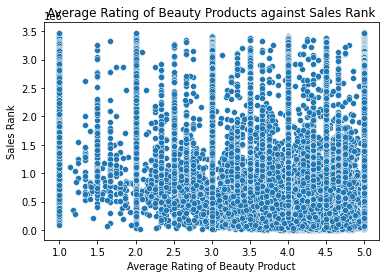

In [30]:
average_v_rank = sns.scatterplot(x='average-rating', 
                                 y='rank',
                                 data=merged_review_table)

average_v_rank.set(xlabel='Average Rating of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Average Rating of Beauty Products against Sales Rank")

### 5.2 Corr: num review && sales rank

In [31]:
num_review = merged_review_table[['asin','number-of-review', 'rank']]
num_review = num_review.sort_values(by=['rank'])
num_review

,asin,number-of-review,rank
8135,B00BXPVIT8,13,35
5863,B006IB5T4W,2790,65
11623,B00HYEPVG8,34,245
3201,B001QY8QXM,4543,280
77,B00005JS5C,2249,457
...,...,...,...
18734,B00TBTBJLA,1,3465939
23707,B015X6LH8E,1,3467691
31228,B01FWLYTG2,1,3469534
3019,B001LNW3ZK,2,3470465


In [32]:
num_review.corr()

,number-of-review,rank
number-of-review,1.000000,-0.120137
rank,-0.120137,1.000000


In [33]:
# sns.heatmap(num_review.corr(),cmap='jet')

In [34]:
# figure, axes = plt.subplots(1, 2)
# num_review.plot(ax=axes[0])
# sns.scatterplot(x="number-of-review", y="rank", data=num_review)

In [35]:
# plt.figure(figsize = (10,8))
# sns.regplot(x="number-of-review", y="rank", data=num_review)
# plt.ylim(0,)

#### 5.2.1 num review 4 bins

In [36]:
# filter out num_review that are too high (consider them as outlier)
num_review_filter = num_review[num_review['number-of-review']<200]
num_review_filter.shape

# 32083(total all) 
# 32029(<500) / 54 (>=500)
# 31856(<200) / 227 (>=200)
# 31540(<100) / 543 (>=100)

(31856, 3)

In [37]:
# square brackets '[]' mean the end point is included
# round parentheses '()' mean it's excluded
num_review_filter['num-review-range'] = pd.cut(num_review_filter['number-of-review'],
                                                  [1, 4, 7, 10, 200], 
                                                  right=True,
                                                  labels=['(0,4]', '(4,7]', '(7,10]', '(10,--]'])
num_review_filter

<ipython-input-37-b99beb1be21d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_review_filter['num-review-range'] = pd.cut(num_review_filter['number-of-review'],


,asin,number-of-review,rank,num-review-range
8135,B00BXPVIT8,13,35,"(10,--]"
11623,B00HYEPVG8,34,245,"(10,--]"
8137,B00BXR0SFG,2,853,"(0,4]"
29417,B01DJI7796,123,1017,"(10,--]"
28053,B01C39X6TW,143,1091,"(10,--]"
...,...,...,...,...
18734,B00TBTBJLA,1,3465939,NaN
23707,B015X6LH8E,1,3467691,NaN
31228,B01FWLYTG2,1,3469534,NaN
3019,B001LNW3ZK,2,3470465,"(0,4]"


In [38]:
num_review_filter['num-review-range'].value_counts()

(0,4]      10112
(10,--]     4273
(4,7]       2818
(7,10]      1447
Name: num-review-range, dtype: int64

<AxesSubplot:xlabel='number-of-review', ylabel='rank'>

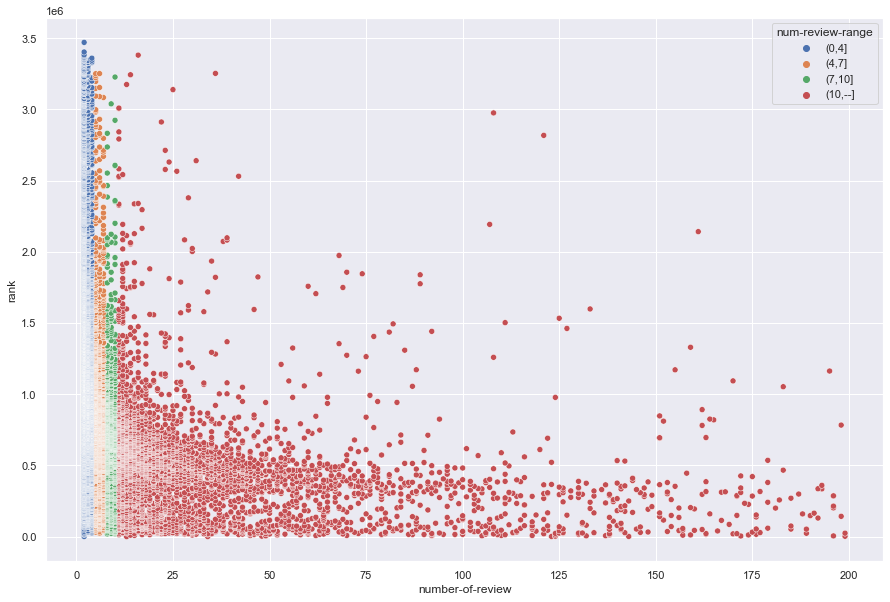

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data = num_review_filter, hue='num-review-range')

Time sensitive

In [40]:
# max date review groupby 'asin'
review_max_date = final_review_table.groupby(['asin'], sort=True)['year'].max()
review_max_date = pd.DataFrame(review_max_date)
review_max_date.reset_index(level=0, inplace=True)

# min date review groupby 'asin'
review_min_date = final_review_table.groupby(['asin'], sort=True)['year'].min()
review_min_date = pd.DataFrame(review_min_date)
review_min_date.reset_index(level=0, inplace=True)

In [41]:
# merge max and min together
# rename column and reset index
review_min_max_date = (pd.merge(review_max_date, review_min_date, on='asin', how='inner', indicator=True)).set_index('asin')
review_min_max_date.rename(columns = {'year_x':'max','year_y':'min'}, inplace = True)
review_min_max_date.drop(['_merge'], axis=1, inplace =True)
review_min_max_date.reset_index(level=0, inplace=True)

# calculate diff between min and max
review_min_max_date = review_min_max_date.astype({'max': 'int', 'min': 'int'})
review_min_max_date['diff'] = (review_min_max_date['max'] - review_min_max_date['min'] + 1)

# final table
review_min_max_date

,asin,max,min,diff
0,6546546450,2013,2009,5
1,7178680776,2017,2017,1
2,7250468162,2017,2017,1
3,7367905066,2017,2017,1
4,7414204790,2018,2014,5
...,...,...,...,...
32480,B01HIWLLUK,2016,2016,1
32481,B01HJ1K3YK,2017,2017,1
32482,B01HJ84SGM,2018,2017,2
32483,B01HJASD20,2016,2016,1


In [42]:
#product_min_max_date['diff'].value_counts()

In [43]:
product_max_date['year'] = product_max_date['year'].astype('int')
#product_max_date = pd.DataFrame(product_max_date)
product_max_date_filter = product_max_date['year'] >= 2015
product_max_date[product_max_date_filter]

NameError: name 'product_max_date' is not defined

#### 5.0.4 Num of review vs sales rank by time frame

In [44]:
product_avgRating_ofEachYear = final_review_table.groupby(['asin','year'], sort=True)['overall'].agg(['mean', 'count'])
product_avgRating_ofEachYear = pd.DataFrame(product_avgRating_ofEachYear)
product_avgRating_ofEachYear.sort_values(by=['year'], inplace=True)
product_avgRating_ofEachYear.reset_index(level=['asin','year'], inplace=True)
product_avgRating_ofEachYear = product_avgRating_ofEachYear[['year','asin','count','mean']]
product_avgRating_ofEachYear

,year,asin,count,mean
0,2000,B000050FED,1,3.000000
1,2000,B000050B62,1,5.000000
2,2000,B000050B64,1,5.000000
3,2000,B000050B69,3,5.000000
4,2000,B000050FDR,2,5.000000
...,...,...,...,...
63128,2018,B01D2CHR80,18,4.166667
63129,2018,B00MPB65BA,1,3.000000
63130,2018,B004MBJL58,23,4.478261
63131,2018,B00M1V17ZI,2,2.500000


In [45]:
avgRating_byYear = (pd.merge(product_rank, product_avgRating_ofEachYear, on='asin', how='inner', indicator=True))
avgRating_byYear.drop(['_merge'], axis=1, inplace =True)
avgRating_byYear.sort_values(by=['year'], inplace=True)
avgRating_byYear = avgRating_byYear[['year','asin','rank','count','mean']]
avgRating_byYear = avgRating_byYear.astype({'year': 'int'})
avgRating_byYear

,year,asin,rank,count,mean
80,2000,B000050B64,3222843,1,5.000000
43,2000,B000050B60,3022008,1,5.000000
48,2000,B000050B62,3359846,1,5.000000
89,2000,B000050FDR,3252951,2,5.000000
84,2000,B000050FDP,3243223,1,5.000000
...,...,...,...,...,...
52104,2018,B018KT5V74,164963,1,5.000000
57514,2018,B01D2CHR80,32356,18,4.166667
44198,2018,B00YFQ4VKU,391786,3,3.666667
34916,2018,B00MXENWO2,23933,13,4.615385


In [46]:
sorted_table = merged_review_table.sort_values(by='rank')
sorted_table.reset_index(drop=True,inplace=True)
sorted_table['nrank'] = sorted_table.index+1
#sorted_table

In [47]:
sorted_table = avgRating_byYear.sort_values(by='rank')
sorted_table.reset_index(drop=True,inplace=True)
sorted_table['nrank'] = sorted_table.index+1
sorted_table

,year,asin,rank,count,mean,nrank
0,2016,B00U9QFWP8,0,2,5.000000,1
1,2015,B0000C4KJV,0,11,4.545455,2
2,2008,B0001HYMFG,0,1,2.000000,3
3,2017,B016LYGHUU,0,1,1.000000,4
4,2015,B0177PWV52,0,1,5.000000,5
...,...,...,...,...,...,...
63128,2016,B015X6LH8E,3467691,1,2.000000,63129
63129,2016,B01FWLYTG2,3469534,1,1.000000,63130
63130,2008,B001LNW3ZK,3470465,1,5.000000,63131
63131,2014,B001LNW3ZK,3470465,1,5.000000,63132


In [48]:
def filterByYear(x, data):
    result = data['year'] == x
    result = data[result]
    return result

In [49]:
def calculateDensity(x_axis, y_axis):
    x= x_axis
    y= y_axis

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    # Sort the points by density, so that the densest points are plotted last
    #idx = z.argsort()
    #x, y, z = x[idx], y[idx], z[idx]
    
    #return density
    return z

In [50]:
frame_list =[]
density_list = []
date_list = []
for x in range(2000, 2019):
    tempPd = filterByYear(x, sorted_table)
    density = calculateDensity(tempPd['count'], tempPd['nrank'])
    tempPd = pd.DataFrame(tempPd)
    frame_list.append(tempPd)
    density_list.append(density)
    date_list.append(str(x))

In [51]:
%matplotlib notebook 
#switch on matplotlib's backend

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter([1,2000], [1,2000], c=[1,2000])
ax.set_title("title")
plt.xlabel("Number of Review")
plt.ylabel("Sales Rank")

def init():
    sc = ax.set_data([], [])
    return sc,

def animate(i):
    ax.scatter(frame_list[i]['count'], frame_list[i]['rank'], c=density_list[i], edgecolor='none')
    ax.set_title(date_list[i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=19, interval=1000)#, interval=100)

# plt.show()  
ani

In [ ]:
!pip install foliantcontrib.imagemagick

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

rc('animation', html='html5')

In [ ]:
from matplotlib.animation import writers
writers.reset_available_writers()
ani.save('C:/Users/Asus/Desktop/Year2_Sem2/Intro to DS/Assignment/Assignment(AmazonBeautyProduct)/amazon-product-analysis/animation.gif', writer='imagemagick', fps=60)

In [ ]:
# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('ani.mp4', writer=writer)

In [ ]:
%matplotlib inline
#switch off matplotlib's backend

### 5.3 Data Binning

In [ ]:
bins = np.linspace(min(merged_review_table['rank']), max(merged_review_table['rank']), 5)
bins

In [ ]:
group_names = ['Very Good', 'Good', 'Moderate', 'Bad']
merged_review_table['rank-binned'] = pd.cut(merged_review_table['rank'], bins, labels=group_names, include_lowest=True)
merged_review_table.head()

In [ ]:
plt.figure(figsize = (5,4))
plt.bar(group_names, merged_review_table['rank-binned'].value_counts())

In [ ]:
plt.figure(figsize = (5,4))
bp = sns.boxplot(x='rank-binned', y='average-rating', data=merged_review_table)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='average-rating', y='rank', data = merged_review_table, hue='rank-binned')

In [ ]:
num_review_am200 = merged_review_table.copy()
num_review_am200 = num_review_am200[num_review_am200['number-of-review']<= 200]


num_review_am200['average-rating-range'] = pd.cut(num_review_am200['average-rating'],
                                                  [0, 3, 4,6], 
                                                  right=False,
                                                  labels=["(1, 3]","(3, 4]","(4, 5)"])
num_review_am200

Unlike `merged_review_table`, the `num_review_am200` only contains product that has at most 200 reviews.



In [ ]:
#Finding correlation for 3 different categories of rating
low_rating = num_review_am200['average-rating-range'] == "(1, 3]"
mod_rating = num_review_am200['average-rating-range'] == "(3, 4]"
high_rating = num_review_am200['average-rating-range'] == "(4, 5)"

low_rating_table = num_review_am200[low_rating]
mod_rating_table = num_review_am200[mod_rating]
high_rating_table = num_review_am200[high_rating]
print(high_rating_table['average-rating'].corr(high_rating_table['rank']),"\n")
print(mod_rating_table['average-rating'].corr(mod_rating_table['rank']),"\n")
print(low_rating_table['average-rating'].corr(low_rating_table['rank']))

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='average-rating', y='rank', data=num_review_am200, hue='average-rating-range', palette=["k", "C3","C0"])

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=num_review_am200, hue='average-rating-range', palette=["k", "C3","C0"])

In [ ]:
plt.subplot(3, 1, 1)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=low_rating_table, color="k")

plt.subplot(3, 1, 2)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=mod_rating_table, color="C3")

plt.subplot(3, 1, 3)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=high_rating_table, color="C0")

### 5.4 Analysing "Very Good" Products

Further analysing product binned in "Very Good". These product ranking falls into the range 35 ~ 870386.75



In [ ]:
vg_filter = merged_review_table['rank'] <= 870386.75
vg_table = merged_review_table[vg_filter]
vg_table.sort_values(by=['rank'])

There are 11379 products that falls in the "Very Good" category, with the highest rank being 35, and the lowest rank is 870359.

We will further bin the products.

In [ ]:
bins_2 = np.linspace(min(vg_table['rank']), max(vg_table['rank']), 5)
bins_2

In [ ]:
group_names_2 = ['1', '2', '3', '4']
vg_table['upper-rank-binned'] = pd.cut(vg_table['rank'], bins_2, labels=group_names_2, include_lowest=True)
vg_table.head()

In [ ]:
plt.figure(figsize = (5,4))
plt.bar(group_names_2, vg_table['upper-rank-binned'].value_counts())

In [ ]:
plt.figure(figsize = (5,4))
bp = sns.boxplot(x='upper-rank-binned', y='average-rating', data=vg_table)

In [ ]:
vg_table.sort_values(by='average-rating')

In [ ]:
vg_table_lt200 = vg_table[vg_table['number-of-review']<200].copy() # cleared 214 products
vg_table_top = vg_table_lt200[vg_table['upper-rank-binned'] == '1'].copy()

vg_table_top['average-rating-range'] = pd.cut(vg_table_top['average-rating'],
                                                  [0, 4, 6], 
                                                  right=False,
                                                  labels=["(1, 4]", "(4, 5)"])
vg_table_top.head() 

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='average-rating', y='rank', data=vg_table_top, hue='average-rating-range', palette=["k", "C3"])

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='number-of-review', y='rank', data=vg_table_top, hue='average-rating-range', palette=["k", "C3"])

### 5.5 Slice Sales Rank < 5000



In [ ]:
#try to take data that have sales rank less than 50000
partial_table = merged_review_table[merged_review_table['rank'] <= 50000]

#min-max normalization
#partial_table['rank'] = (partial_table['rank'] - partial_table['rank'].min())/(partial_table['rank'].max()-partial_table['rank'].min())
partial_table

In [ ]:
partial_table.corr()

In [ ]:
num_review = partial_table[['asin','number-of-review', 'rank']]
num_review = num_review.sort_values(by=['rank'])
num_review

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="number-of-review", y="rank", data=num_review)

In [ ]:
plt.figure(figsize = (10,8))
average_v_rank = sns.scatterplot(x='average-rating', 
                                 y='rank',
                                 data=partial_table)

average_v_rank.set(xlabel='Average Rating of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Average Rating of Beauty Products against Sales Rank")

### 5.6 Price VS Sales Rank

In [ ]:
price_rank_table = product_table[['asin','rank','price']]
num_review_table = mv_review_table[['asin','number-of-review']]
# merge number of reviews
merged_price_table = (pd.merge(price_rank_table, num_review_table , on='asin', how='inner', indicator=True)).set_index('asin')
merged_price_table.reset_index(inplace = True)
merged_price_table = merged_price_table.drop(['_merge'],axis = 1)
merged_price_table.rename(columns={'overall':'number-of-review'},inplace=True)

# filter out product with 0 as sales rank 
merged_price_table = merged_price_table[merged_price_table['rank'] > 0]
merged_price_table = merged_price_table[merged_price_table['price'] > 0]

#remove outliers
price_z_scores = stats.zscore(pd.DataFrame(merged_price_table['price']))
price_abs_z_scores = np.abs(price_z_scores)
price_outlier = (price_abs_z_scores > 3).all(axis=1)
merged_price_table.drop(merged_price_table[price_outlier].index, inplace = True)
merged_price_table.sort_values(by=['rank']) 

In [ ]:
#min-max normalization
#price_rank_table['rank'] = (price_rank_table['rank'] - price_rank_table['rank'].min())/(price_rank_table['rank'].max()-price_rank_table['rank'].min())

In [ ]:
filter_num_review = merged_price_table['number-of-review'] < 8
merged_price_table = merged_price_table[filter_num_review]
merged_price_table.sort_values(by=['price'])

In [ ]:
merged_price_table.corr()

In [ ]:
plt.figure(figsize = (10,8))
price_rank_graph = sns.scatterplot(x='price', 
                                 y='rank',
                                 data=merged_price_table)

price_rank_graph .set(xlabel='Price of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Price of Beauty Products against Sales Rank")

### 5.8 test_review_table['vote']

What 'vote' means? Check out
https://www.amazon.com/review/top-reviewer-faq.html

Summary: if people found your review helpful, they can give you a vote, if people found your review no helpful and decide to downvote you, your vote will get substracted

test_review_table

1. Check how many unkown
2. check max and min
3. check trend

In [ ]:
review_table['vote'].value_counts().sort_index()
# Result row 362403 (all) - 50504 (vote notnull) = 311899(vote isnull)

In [ ]:
rating_grouping = final_review_table[['asin', 'overall']]

# count by number of high rating reviews
high_review_count = rating_grouping.groupby(['asin'])['overall'].apply(lambda x: (x >= 4).sum())
high_review_count = pd.DataFrame(high_review_count)
high_review_count.rename(columns={'overall':'number-of-high-rating-review'},inplace=True)
high_review_count.reset_index(inplace = True)

# count by number of low rating reviews
low_review_count = rating_grouping.groupby(['asin'])['overall'].apply(lambda x: (x < 4).sum())
low_review_count = pd.DataFrame(low_review_count)
low_review_count.rename(columns={'overall':'number-of-low-rating-review'},inplace=True)
low_review_count.reset_index(inplace = True)

In [ ]:
# m is a updated version of merged_review_table, with column recording the number of high & low rating reviews of each products
m = (pd.merge(high_review_count, low_review_count, on='asin', how='inner', indicator=True)).set_index('asin')
m.reset_index(inplace=True)
m = m.drop(['_merge'],axis = 1)
m

m = (pd.merge(merged_review_table, m, on='asin', how='inner', indicator=True)).set_index('asin')
m.reset_index(inplace=True)
m = m.drop(['_merge'],axis = 1)
m


In [ ]:
# ploting a graph to see the relationship between number of high rating reviews (those that are >= 4), and the sales rank

# getting those products that have at least one high rating review
m1 = m[m['number-of-high-rating-review'] > 0]
# we have 27858 products here
sns.scatterplot(x="number-of-high-rating-review", y="rank", data=m1)

In [ ]:
# ploting a graph to see the relationship between number of low rating reviews (those that are < 4), and the sales rank

# getting those products that have at least one low rating review
m2 = m[m['number-of-low-rating-review'] > 0]
# we have 15950 products here
sns.scatterplot(x="number-of-low-rating-review", y="rank", data=m2)

## Data Mining

## Data Visualization

## Conclusion